In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score ,GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [42]:
df = pd.read_csv('../data/processed_data.csv')
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   float64
 5   PhoneService                           7043 non-null   int64  
 6   OnlineSecurity                         7043 non-null   int64  
 7   DeviceProtection                       7043 non-null   int64  
 8   TechSupport                            7043 non-null   int64  
 9   StreamingTV                            7043 non-null   int64  
 10  StreamingMovies                        7043 non-null   int64  
 11  Pape

Firs we will do a manual split on the dtaset into a 70 to 30 ratio and see the performing rates of random forest

In [43]:
X = df.drop('Churn',axis=1)
y = df['Churn']

#We will be spliting the data into training and test subdatasets
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
rf_split = RandomForestClassifier()
rf_split.fit(X_train,y_train)

#Rewieving Scores from Random tree
y_pred_rf_split = rf_split.predict(X_test)
print(accuracy_score(y_test,y_pred_rf_split))
print(confusion_matrix(y_test,y_pred_rf_split))
print(classification_report(y_test,y_pred_rf_split))

0.7936583057264552
[[1409  130]
 [ 306  268]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1539
           1       0.67      0.47      0.55       574

    accuracy                           0.79      2113
   macro avg       0.75      0.69      0.71      2113
weighted avg       0.78      0.79      0.78      2113



Now we will use random tree with a randomly splitted data still using a 70:30 ratio

In [45]:
X = df.drop('Churn',axis=1)
y = df['Churn']

#We will be spliting the data into training and test subdatasets
X_train_RS,X_test_RS,y_train_RS,y_test_RS = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [46]:
rf_Rsplit = RandomForestClassifier()
rf_Rsplit.fit(X_train_RS,y_train_RS)

#Rewieving Scores from Random tree
y_pred_rf_Rsplit = rf_Rsplit.predict(X_test_RS)
print(accuracy_score(y_test_RS,y_pred_rf_Rsplit))
print(confusion_matrix(y_test_RS,y_pred_rf_Rsplit))
print(classification_report(y_test_RS,y_pred_rf_Rsplit))

0.7908187411263606
[[1413  126]
 [ 316  258]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.86      1539
           1       0.67      0.45      0.54       574

    accuracy                           0.79      2113
   macro avg       0.74      0.68      0.70      2113
weighted avg       0.78      0.79      0.78      2113



And here we will use random split but with stratification

In [47]:
X = df.drop('Churn',axis=1)
y = df['Churn']

X_train_RSS,X_test_RSS,y_train_RSS,y_test_RSS = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True, stratify=y)

In [48]:
rf_RsplitS = RandomForestClassifier()
rf_RsplitS.fit(X_train_RSS,y_train_RSS)

#Rewieving Scores from Random tree
y_pred_rf_RsplitS = rf_RsplitS.predict(X_test_RSS)
print(accuracy_score(y_test_RSS,y_pred_rf_RsplitS))
print(confusion_matrix(y_test_RSS,y_pred_rf_RsplitS))
print(classification_report(y_test_RSS,y_pred_rf_RsplitS))

0.7827733080927591
[[1389  163]
 [ 296  265]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1552
           1       0.62      0.47      0.54       561

    accuracy                           0.78      2113
   macro avg       0.72      0.68      0.70      2113
weighted avg       0.77      0.78      0.77      2113



And finaly we will try out wiht a 10 fold cross validation

In [49]:
rf_CV = RandomForestClassifier()
cv_scores = cross_val_score(rf_CV,X,y,cv=10,scoring='accuracy')
print("\nCross-Validation Results")
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean cross-validation score: {cv_scores.mean()}")


Cross-Validation Results
Cross-validation scores: [0.79716312 0.80283688 0.79716312 0.78835227 0.78551136 0.75710227
 0.82244318 0.78977273 0.80113636 0.80113636]
Mean cross-validation score: 0.794261766602192


Now we will proceed with hyperparameter tuning using GridSearch and a 3 fold CV

In [50]:
param_grid = {
    'n_estimators': [100],  # Fewer estimators
    'max_depth': [10],  # Fewer depths
    'min_samples_split':  [5],  # Fewer options for split
    'min_samples_leaf': [1],   # Fewer leaf options
    'max_features': ['sqrt'],  # Reduce to fewer choices
    'bootstrap': [True]  # Use one option for bootstrap
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid,  cv=3, n_jobs=-1, verbose=2, scoring='accuracy', error_score='raise')

grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters found: ", grid_search.best_params_)

# Evaluate the best model on the test data
rf_best = grid_search.best_estimator_
y_pred_best = rf_best.predict(X_test)
print("Best Model Performance on Test Data")
print(accuracy_score(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters found:  {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Model Performance on Test Data
0.8059630856601988
[[1411  128]
 [ 282  292]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1539
           1       0.70      0.51      0.59       574

    accuracy                           0.81      2113
   macro avg       0.76      0.71      0.73      2113
weighted avg       0.80      0.81      0.80      2113



Now lets compare all the random forest models

In [51]:
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    confusion = confusion_matrix(y_true, y_pred)
    report = classification_report(y_true, y_pred, output_dict=True)
    return {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': report['macro avg']['precision'],
        'Recall': report['macro avg']['recall'],
        'F1 Score': report['macro avg']['f1-score'],
        'Confusion Matrix': confusion
    }

# Evaluate all models
manual_split_results = evaluate_model(y_test, y_pred_rf_split, 'Manual Split')
random_split_results = evaluate_model(y_test_RS, y_pred_rf_Rsplit, 'Random Split')
stratified_split_results = evaluate_model(y_test_RSS, y_pred_rf_RsplitS, 'Stratified Random Split')
tuned_model_results = evaluate_model(y_test, y_pred_best, 'Tuned Model')

# Collect all results
comparison_results = [manual_split_results, random_split_results, stratified_split_results, tuned_model_results]

# Create a DataFrame for comparison
comparison_df = pd.DataFrame(comparison_results)
print("\nModel Comparison Results")
print(comparison_df)


Model Comparison Results
                     Model  Accuracy  Precision    Recall  F1 Score  \
0             Manual Split  0.793658   0.747471  0.691214  0.708726   
1             Random Split  0.790819   0.744555  0.683803  0.701686   
2  Stratified Random Split  0.782773   0.721746  0.683672  0.697048   
3              Tuned Model  0.805963   0.764335  0.712770  0.730334   

            Confusion Matrix  
0  [[1409, 130], [306, 268]]  
1  [[1413, 126], [316, 258]]  
2  [[1389, 163], [296, 265]]  
3  [[1411, 128], [282, 292]]  


And lets visulise oru results with a bar plot

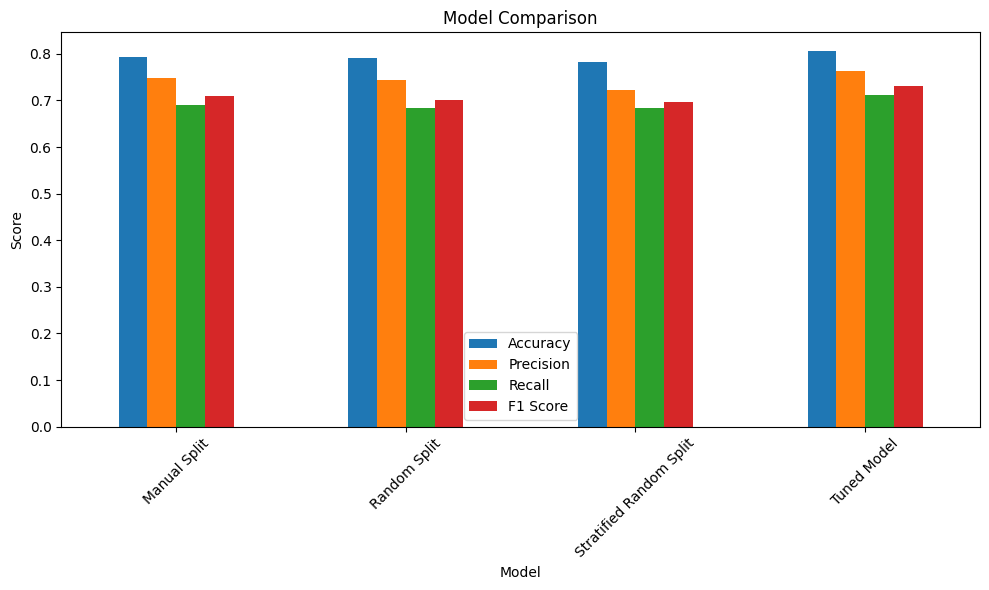

In [52]:
comparison_df.set_index('Model', inplace=True)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
comparison_df[metrics].plot(kind='bar', figsize=(10, 6))
plt.title('Model Comparison')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We can conclude that the best performing model is the tuned model, but the classification of class B or 1 has low recall and f1 scores therefore it would be best to to some overfitting so that those scores are improved

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

In [54]:
y_train_df = pd.DataFrame(y_train, columns=["Churn"])
y_test_df = pd.DataFrame(y_test, columns=["Churn"])

print('\nTrain Set Class Distribution:')
print(y_train_df.value_counts(normalize=True) * 100)
print('\nTest Set Class Distribution:')
print(y_test_df.value_counts(normalize=True) * 100)


Train Set Class Distribution:
Churn
0        73.732252
1        26.267748
Name: proportion, dtype: float64

Test Set Class Distribution:
Churn
0        72.834832
1        27.165168
Name: proportion, dtype: float64


In [55]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

C:\Users\david\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, 
                                                    test_size=0.3, 
                                                    random_state=42, 
                                                    stratify=y_resampled)

In [57]:
param_grid = {
    'n_estimators': [100],  # Fewer estimators
    'max_depth': [10],  # Fewer depths
    'min_samples_split':  [5],  # Fewer options for split
    'min_samples_leaf': [1],   # Fewer leaf options
    'max_features': ['sqrt'],  # Reduce to fewer choices
    'bootstrap': [True]  # Use one option for bootstrap
}


grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid,  cv=3, n_jobs=-1, verbose=2, scoring='accuracy', error_score='raise')

grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters found: ", grid_search.best_params_)

# Evaluate the best model on the test data
rf_best_OS = grid_search.best_estimator_
y_pred_best_OS = rf_best_OS.predict(X_test)
print("Best Model Performance on Test Data")
print(accuracy_score(y_test, y_pred_best_OS))
print(confusion_matrix(y_test, y_pred_best_OS))
print(classification_report(y_test, y_pred_best_OS))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters found:  {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Model Performance on Test Data
0.8122383252818035
[[1188  365]
 [ 218 1334]]
              precision    recall  f1-score   support

           0       0.84      0.76      0.80      1553
           1       0.79      0.86      0.82      1552

    accuracy                           0.81      3105
   macro avg       0.82      0.81      0.81      3105
weighted avg       0.82      0.81      0.81      3105



We have succesfully raised the precision, recall and f1-score for class B or 1 in the Random Forest model, and now we can save it for furhter comparison

In [58]:
import joblib
joblib.dump(rf_best_OS, 'best_rf_model_AS.pkl')

['best_rf_model_AS.pkl']